In [2]:
import os
import tensorflow as tf
import glob
import pathlib
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image

from tensorflow.keras.layers import Dense,Conv2D,Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [3]:
train="D:\\GitHub\\Bird-Classifier\\data\\train"
test="D:\\GitHub\\Bird-Classifier\\data\\test"
valid="D:\\GitHub\\Bird-Classifier\\data\\valid"

In [4]:
def process(data):
    path=pathlib.Path(data)#converting the string to path
    filepaths=list(path.glob(r"*/*.jpg"))#Going through all the subpaths 
    labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))#Separating the label from filepath and storing it
    df1=pd.Series(filepaths,name='filepaths').astype(str)
    df2=pd.Series(labels,name='labels')
    df=pd.concat([df1,df2],axis=1)#Making the dataframe
    return df

process(test)

,filepaths,labels
0,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
1,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
2,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
3,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
4,D:\GitHub\Bird-Classifier\data\test\AFRICAN CR...,AFRICAN CROWNED CRANE
...,...,...
1620,D:\GitHub\Bird-Classifier\data\test\YELLOW HEA...,YELLOW HEADED BLACKBIRD
1621,D:\GitHub\Bird-Classifier\data\test\YELLOW HEA...,YELLOW HEADED BLACKBIRD
1622,D:\GitHub\Bird-Classifier\data\test\YELLOW HEA...,YELLOW HEADED BLACKBIRD
1623,D:\GitHub\Bird-Classifier\data\test\YELLOW HEA...,YELLOW HEADED BLACKBIRD


In [5]:
df_train=process(train)
df_test=process(test)
df_valid=process(valid)

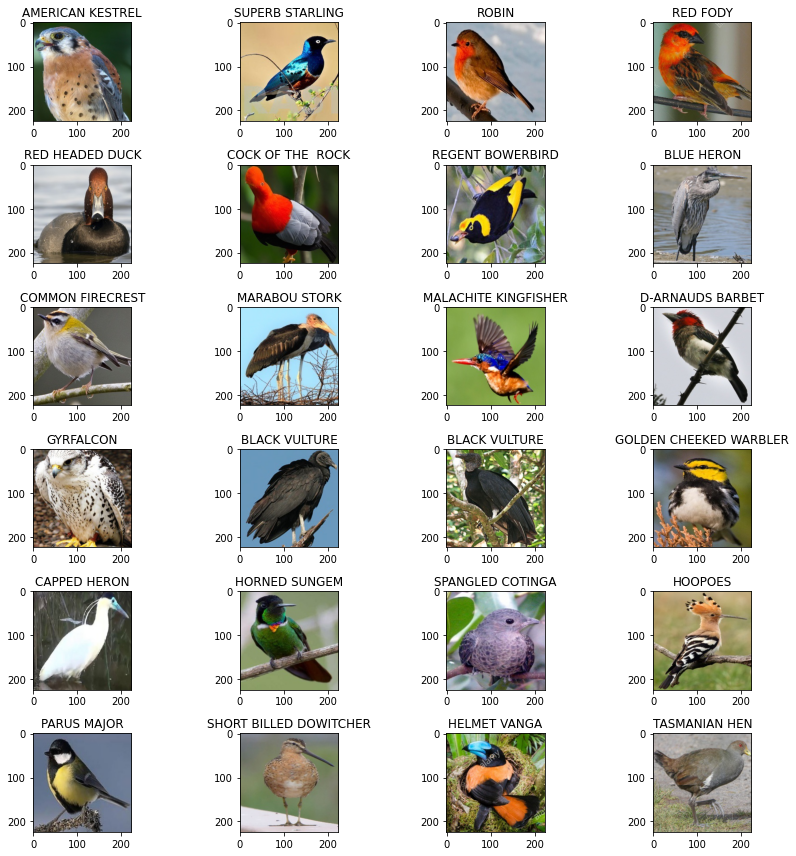

In [6]:
df_train=df_train.sample(frac=1).reset_index(drop=True)#Shuffling the dataframe so we can get random bird pictures
fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(12,12))

for i,ax in enumerate(axes.flat): 
    x=plt.imread(df_train['filepaths'][i])#reading the image
    ax.imshow(x)
    ax.set_title(df_train['labels'][i])
plt.tight_layout()    
plt.show() 

In [7]:
train_generator=ImageDataGenerator( preprocessing_function=preprocess_input)
test_generator=ImageDataGenerator( preprocessing_function=preprocess_input)
valid_generator=ImageDataGenerator( preprocessing_function=preprocess_input)

In [62]:
train_image=train_generator.flow_from_dataframe(dataframe=df_train,
                                                x_col='filepaths',
                                                y_col='labels',
                                                target_size=(224,224),
                                                batch_size=64,
                                                subset='training',
                                                random_seed=42)

test_image = test_generator.flow_from_dataframe(
    dataframe=df_test,
    x_col='filepaths',
    y_col='labels',
    target_size=(224,224),
    batch_size=8
)

valid_image = test_generator.flow_from_dataframe(
    dataframe=df_valid,
    x_col='filepaths',
    y_col='labels',
    subset='training',
    target_size=(224,224),
    batch_size=32)

Found 47332 validated image filenames belonging to 325 classes.
Found 1625 validated image filenames belonging to 325 classes.
Found 1625 validated image filenames belonging to 325 classes.


In [42]:
classes = train_image.classes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


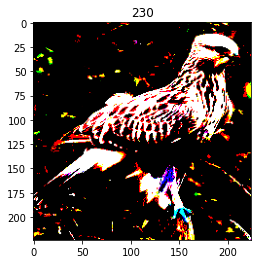

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


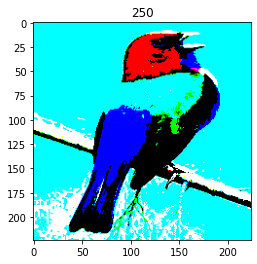

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


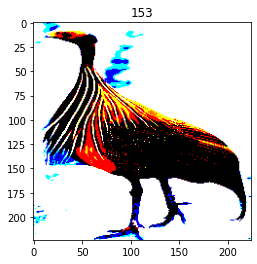

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


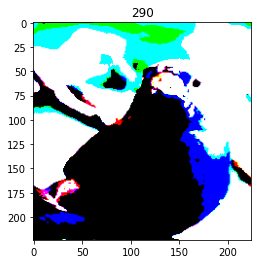

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


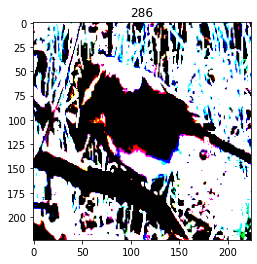

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


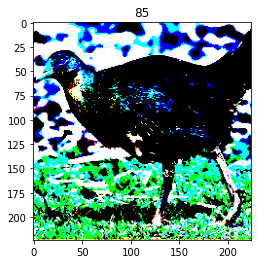

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


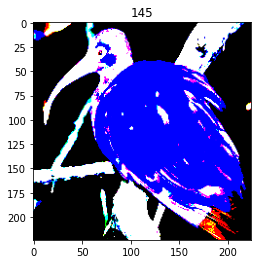

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


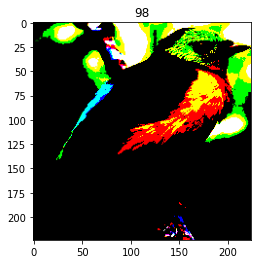

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


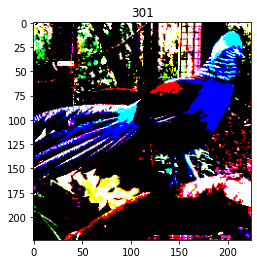

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


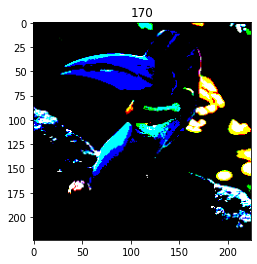

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


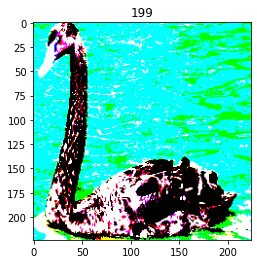

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


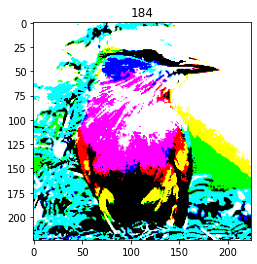

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


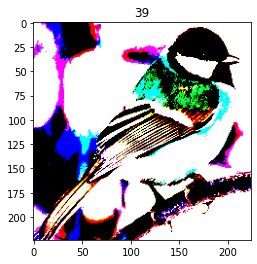

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


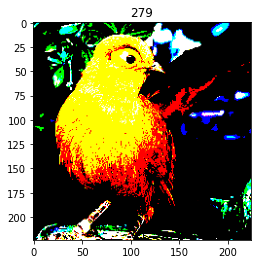

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 224, 224, 3)


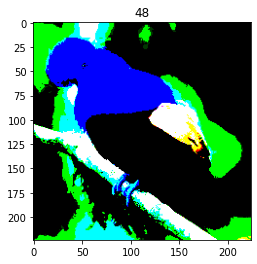

In [79]:
for i in range(15):
   img, label = train_image[i]
   label = np.argmax(label, axis=-1)
   print(img.shape) 
   plt.title(classes[label[1]])
   plt.imshow(img[1])
   plt.show()

In [11]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg_model.trainable = False
layer0 = tf.keras.layers.Flatten()(vgg_model.output)
layer1 = tf.keras.layers.Dense(4096, activation='relu')(layer0)
layer2 = tf.keras.layers.Dense(4096, activation='relu')(layer1)
out_layer = tf.keras.layers.Dense(325, activation='softmax')(layer2)
vgg_model = tf.keras.Model(vgg_model.input, out_layer)
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
from keras.metrics import Precision, Recall

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
vgg_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy', Precision(), Recall()])
callbacks = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [13]:
from tensorflow.python.keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

In [14]:
with tf.device('/device:GPU:0'):

    history = vgg_model.fit(
        train_image, 
        epochs=15,
        verbose=1,
        validation_data = valid_image,
        callbacks=callbacks, batch_size = 64)

Epoch 1/15
740/740 [==============================] - 718s 938ms/step - loss: 3.1611 - accuracy: 0.5609 - precision: 0.6794 - recall: 0.5147 - val_loss: 0.8634 - val_accuracy: 0.8160 - val_precision: 0.8647 - val_recall: 0.7945
Epoch 2/15
740/740 [==============================] - 596s 805ms/step - loss: 0.2458 - accuracy: 0.9407 - precision: 0.9543 - recall: 0.9308 - val_loss: 0.9125 - val_accuracy: 0.8240 - val_precision: 0.8518 - val_recall: 0.8098
Epoch 3/15
740/740 [==============================] - 571s 771ms/step - loss: 0.2500 - accuracy: 0.9451 - precision: 0.9535 - recall: 0.9392 - val_loss: 1.2521 - val_accuracy: 0.7926 - val_precision: 0.8227 - val_recall: 0.7852
Epoch 4/15
740/740 [==============================] - 343s 463ms/step - loss: 0.2901 - accuracy: 0.9387 - precision: 0.9464 - recall: 0.9334 - val_loss: 0.9207 - val_accuracy: 0.8437 - val_precision: 0.8608 - val_recall: 0.8375
Epoch 5/15
740/740 [==============================] - 338s 457ms/step - loss: 0.2281 - a

In [21]:
vgg_model.save('D:\\GitHub\\Bird-Classifier\\models\\vgg16', save_format='h5')

In [22]:
ret_model = tf.keras.models.load_model('D:\\GitHub\\Bird-Classifier\\models\\vgg16')

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BANDED PITA', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIRD', 'BEARDED REEDLING', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK & YELLOW bROADBILL', 'BLACK BAZA', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED BUSHTIT', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLONDE CRESTED WOODPECKER', 'BLUE COAU', 'BLUE GROUSE', 'BLUE HERON', 'BLUE THROATED TOUCANET', 'BOBOLINK', 'BO

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


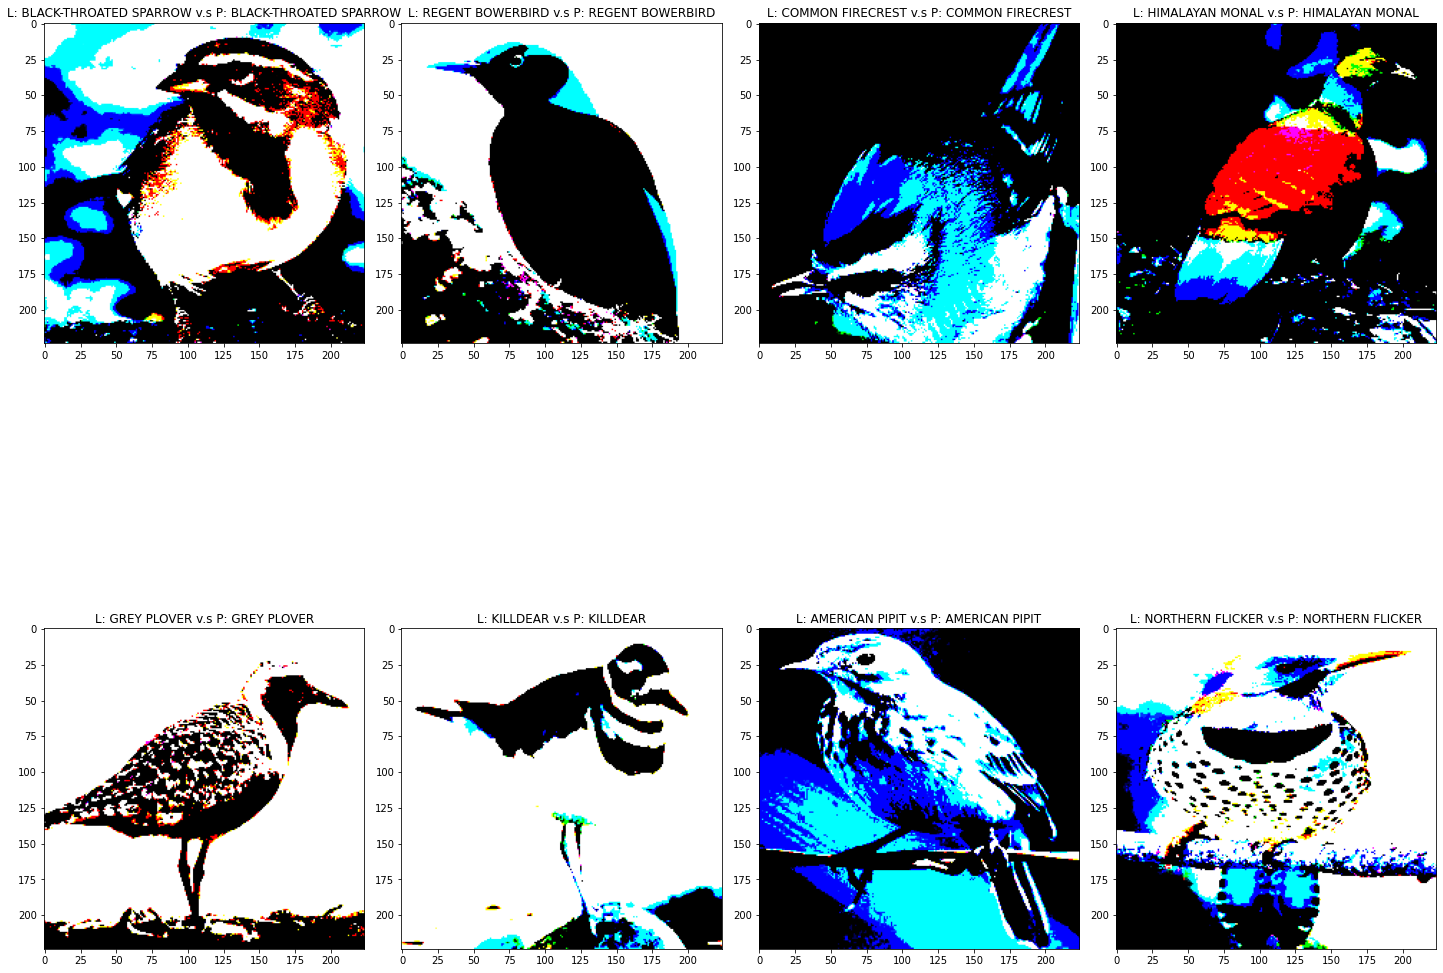

In [93]:
ref = list(train_image.class_indices.keys())

print(ref)

images, labels = test_image.next()


preds = vgg_model.predict(images, batch_size = 8)
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,20))
dic={i:ax for i,ax in enumerate(axes.flat)}
for i in range(0,8):
    label = np.argmax(labels[i])
    pred = np.argmax(preds[i])
    image = images[i]
    dic[i].set_title("L: " + ref[label] + " v.s " + "P: " + ref[pred])
    dic[i].imshow(image)
plt.tight_layout()    
plt.show() 